In [1]:
#Q1 Train a Decision Tree Classifier on the Iris dataset and print the model accuracy?
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict & Accuracy
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#Q2: Train Decision Tree Classifier using Gini Impurity and print feature importances?
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

print("Feature Importances:", clf_gini.feature_importances_)

Feature Importances: [0.         0.01911002 0.89326355 0.08762643]


In [5]:
#Q3: Train Decision Tree Classifier using Entropy and print accuracy?
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred))


Accuracy (Entropy): 0.9777777777777777


In [4]:
#Q4: Train a Decision Tree Regressor on housing dataset and evaluate using MSE?
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
Xh, yh = housing.data, housing.target

Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(Xh_train, yh_train)

yh_pred = reg.predict(Xh_test)
print("MSE:", mean_squared_error(yh_test, yh_pred))

MSE: 0.5280096503174904


In [3]:
#Q5: Train Decision Tree Classifier and visualize using Graphviz?
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as PDF
graph.view()

'decision_tree.pdf'

In [6]:
#Q6: Train with max_depth=3 and compare with fully grown tree?
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)

print("Accuracy (max_depth=3):", accuracy_score(y_test, clf_depth3.predict(X_test)))
print("Accuracy (full tree):", accuracy_score(y_test, clf.predict(X_test)))

Accuracy (max_depth=3): 1.0
Accuracy (full tree): 1.0


In [7]:
#Q7: Train with min_samples_split=5 and compare with default
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_split5.fit(X_train, y_train)

print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split5.predict(X_test)))
print("Accuracy (default):", accuracy_score(y_test, clf.predict(X_test)))

Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


In [8]:
#Q8: Apply feature scaling before training Decision Tree
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(Xs_train, ys_train)

print("Accuracy with scaled data:", accuracy_score(ys_test, clf_scaled.predict(Xs_test)))
print("Accuracy without scaling:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy with scaled data: 1.0
Accuracy without scaling: 1.0


In [9]:
#Q9: Train using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

print("Accuracy (OvR):", accuracy_score(y_test, ovr_clf.predict(X_test)))

Accuracy (OvR): 1.0


In [10]:
#Q10: Train Decision Tree Classifier and display feature importance scores
print("Feature importances:", clf.feature_importances_)

Feature importances: [0.         0.01911002 0.89326355 0.08762643]


In [11]:
#Q11: Train Decision Tree Regressor with max_depth=5 and compare performance
reg_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_depth5.fit(Xh_train, yh_train)

print("MSE (max_depth=5):", mean_squared_error(yh_test, reg_depth5.predict(Xh_test)))
print("MSE (unrestricted):", mean_squared_error(yh_test, reg.predict(Xh_test)))

MSE (max_depth=5): 0.5210801561811793
MSE (unrestricted): 0.5280096503174904


In [12]:
#Q12: Train Decision Tree Classifier, apply Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf_pruned.fit(X_train, y_train)
    print(f"Alpha={alpha:.4f}, Accuracy={accuracy_score(y_test, clf_pruned.predict(X_test))}")

Alpha=0.0000, Accuracy=1.0
Alpha=0.0092, Accuracy=1.0
Alpha=0.0127, Accuracy=1.0
Alpha=0.0127, Accuracy=1.0
Alpha=0.0185, Accuracy=1.0
Alpha=0.0271, Accuracy=0.9777777777777777
Alpha=0.2503, Accuracy=0.7111111111111111
Alpha=0.3121, Accuracy=0.28888888888888886


In [13]:
#Q13: Train Decision Tree Classifier and evaluate Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


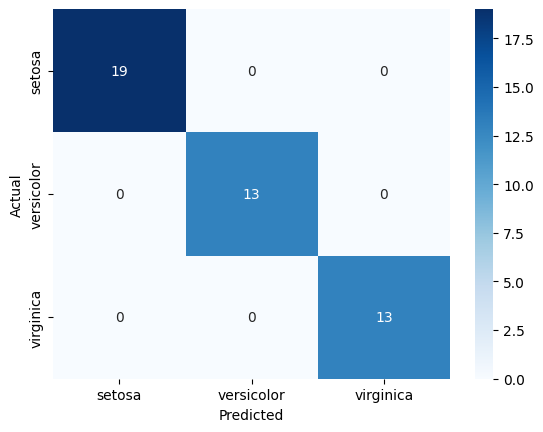

In [14]:
#Q14: Visualize confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
#Q15: Use GridSearchCV to find optimal max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Accuracy: 0.9428571428571428
